# NATURAL GAS PRICE PREDICTION

# Importing the Libraries

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset

In [79]:
data=pd.read_csv('daily_csv.csv')
data

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00
...,...,...
5933,2020-08-05,2.23
5934,2020-08-06,2.26
5935,2020-08-07,2.15
5936,2020-08-10,2.18


# Data preprocessing

## Reading the dataset

In [80]:
data.head()

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00


In [81]:
data.tail()

,Date,Price
5933,2020-08-05,2.23
5934,2020-08-06,2.26
5935,2020-08-07,2.15
5936,2020-08-10,2.18
5937,2020-08-11,2.19


In [82]:
# convert the date column into a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# extract the day, month, and year components
data['day'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year

In [83]:
data.head()

,Date,Price,day,month,year
0,1997-01-07,3.82,7,1,1997
1,1997-01-08,3.80,8,1,1997
2,1997-01-09,3.61,9,1,1997
3,1997-01-10,3.92,10,1,1997
4,1997-01-13,4.00,13,1,1997


In [84]:
#Droping the data column
data.drop('Date',axis=1,inplace=True)

In [85]:
data.head()

,Price,day,month,year
0,3.82,7,1,1997
1,3.80,8,1,1997
2,3.61,9,1,1997
3,3.92,10,1,1997
4,4.00,13,1,1997


## Handling Null Values

In [86]:
data.isnull().any()

Price     True
day      False
month    False
year     False
dtype: bool

In [87]:
data.isnull().sum()

Price    1
day      0
month    0
year     0
dtype: int64

In [88]:
#Filling the na value in price column with median
data['Price'].fillna(data['Price'].median(), inplace=True)
data.head()

,Price,day,month,year
0,3.82,7,1,1997
1,3.80,8,1,1997
2,3.61,9,1,1997
3,3.92,10,1,1997
4,4.00,13,1,1997


In [89]:
data.isnull().sum()

Price    0
day      0
month    0
year     0
dtype: int64

In [90]:
data.shape

(5938, 4)

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5938 entries, 0 to 5937
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   5938 non-null   float64
 1   day     5938 non-null   int32  
 2   month   5938 non-null   int32  
 3   year    5938 non-null   int32  
dtypes: float64(1), int32(3)
memory usage: 116.1 KB


In [92]:
data.describe()

,Price,day,month,year
count,5938.000000,5938.000000,5938.000000,5938.000000
mean,4.189121,15.712193,6.468003,2008.366959
std,2.191042,8.742158,3.415981,6.825348
min,1.050000,1.000000,1.000000,1997.000000
25%,2.660000,8.000000,4.000000,2002.000000
50%,3.540000,16.000000,6.000000,2008.000000
75%,5.240000,23.000000,9.000000,2014.000000
max,18.480000,31.000000,12.000000,2020.000000


## Finding and Removing Outliers

<Axes: xlabel='Price'>

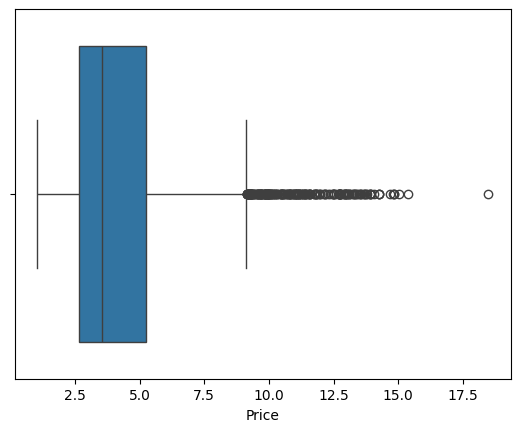

In [93]:
sns.boxplot(data['Price'], orient = 'h')

In [94]:
#Finding IQR
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3-Q1
print(Q1)
print(Q3)
print(IQR)

2.66
5.24
2.58


In [95]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(lower_limit)
print(upper_limit)

-1.21
9.11


In [96]:
data[(data['Price']<lower_limit) | (data['Price']>upper_limit)]

,Price,day,month,year
985,9.96,11,12,2000
990,9.28,18,12,2000
992,9.95,20,12,2000
993,10.49,21,12,2000
994,10.48,22,12,2000
...,...,...,...,...
2882,9.34,25,7,2008
2883,9.26,28,7,2008
2884,9.17,29,7,2008
2886,9.26,31,7,2008


In [97]:
data = data[(data.Price>lower_limit)&(data.Price<upper_limit)]
data.head()

,Price,day,month,year
0,3.82,7,1,1997
1,3.80,8,1,1997
2,3.61,9,1,1997
3,3.92,10,1,1997
4,4.00,13,1,1997


In [98]:
data.shape

(5720, 4)

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5720 entries, 0 to 5937
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   5720 non-null   float64
 1   day     5720 non-null   int32  
 2   month   5720 non-null   int32  
 3   year    5720 non-null   int32  
dtypes: float64(1), int32(3)
memory usage: 156.4 KB


In [100]:
data.describe()

,Price,day,month,year
count,5720.000000,5720.000000,5720.000000,5720.000000
mean,3.921470,15.701573,6.443706,2008.453671
std,1.710832,8.741049,3.415144,6.925852
min,1.050000,1.000000,1.000000,1997.000000
25%,2.620000,8.000000,3.000000,2002.000000
50%,3.430000,16.000000,6.000000,2009.000000
75%,4.910000,23.000000,9.000000,2015.000000
max,9.100000,31.000000,12.000000,2020.000000


In [101]:
data.corr()

,Price,day,month,year
Price,1.000000,-0.006649,-0.019581,-0.174107
day,-0.006649,1.000000,-0.011595,0.000772
month,-0.019581,-0.011595,1.000000,-0.024857
year,-0.174107,0.000772,-0.024857,1.000000


## Data Visualization

LINE PLOT

Text(0.5, 1.0, 'PRICE OF NATURAL GAS ON THE BASIS OF YEARS')

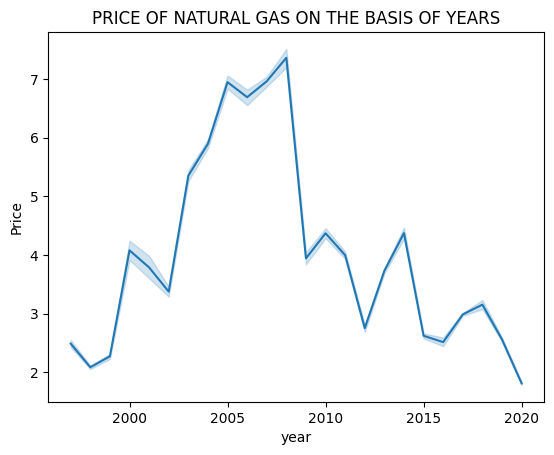

In [102]:
sns.lineplot(x=data['year'],y=data['Price'])
plt.xlabel('year')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF YEARS')

Text(0.5, 1.0, 'PRICE OF NATURAL GAS ON THE BASIS OF MONTHS')

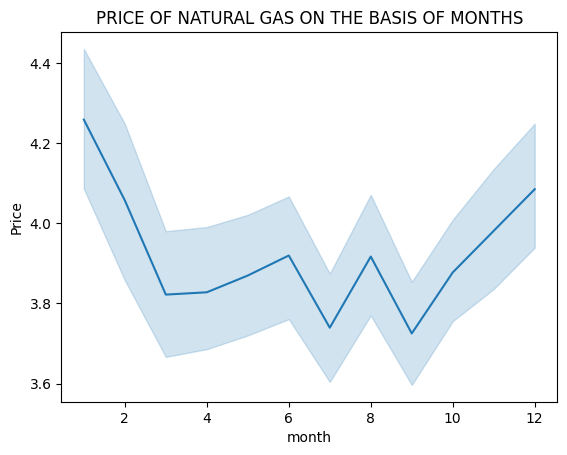

In [103]:
sns.lineplot(x=data['month'],y=data['Price'])
plt.xlabel('month')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS')

Text(0.5, 1.0, 'PRICE OF NATURAL GAS ON THE BASIS OF DAYS')

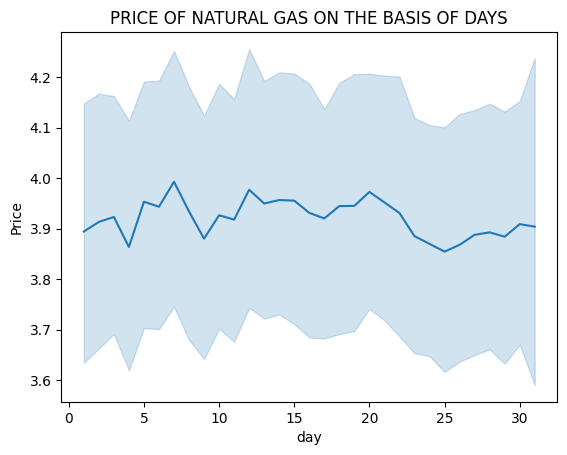

In [104]:
sns.lineplot(x=data['day'],y=data['Price'])
plt.xlabel('day')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF DAYS')

BAR PLOT

Text(0.5, 1.0, 'PRICE OF NATURAL GAS ON THE BASIS OF YEARS')

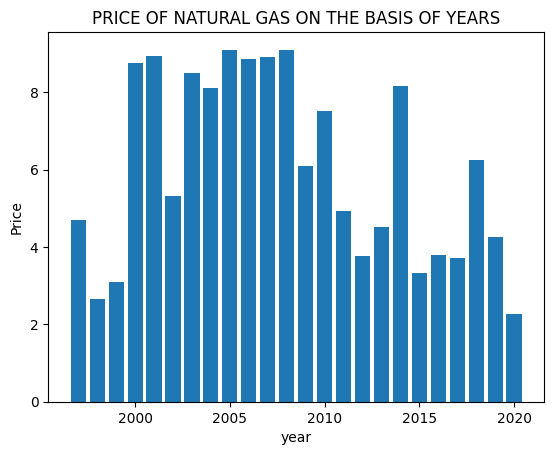

In [105]:
plt.bar(data['year'],data['Price'])
plt.xlabel('year')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF YEARS')

Text(0.5, 1.0, 'PRICE OF NATURAL GAS ON THE BASIS OF MONTHS')

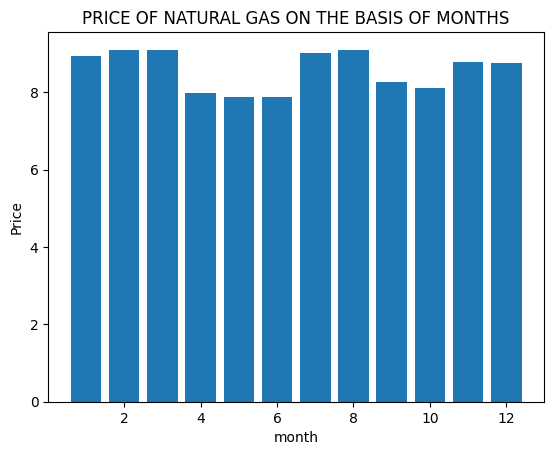

In [106]:
plt.bar(data['month'],data['Price'])
plt.xlabel('month')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS')

Text(0.5, 1.0, 'PRICE OF NATURAL GAS ON THE BASIS OF DAYS')

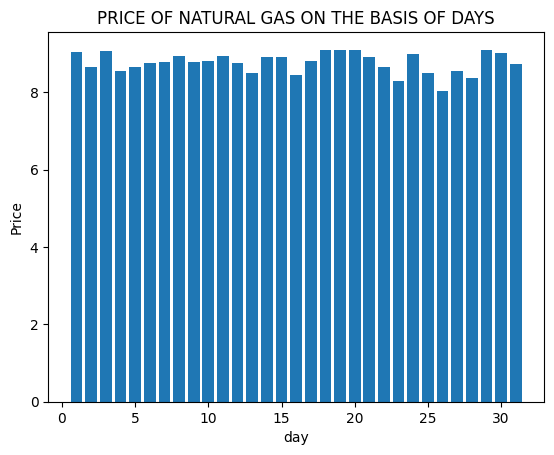

In [107]:
plt.bar(data['day'],data['Price'])
plt.xlabel('day')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF DAYS')

HISTOGRAM

(array([ 261., 1214., 1422.,  871.,  592.,  418.,  382.,  312.,  189.,
          59.]),
 array([1.05 , 1.855, 2.66 , 3.465, 4.27 , 5.075, 5.88 , 6.685, 7.49 ,
        8.295, 9.1  ]),
 <BarContainer object of 10 artists>)

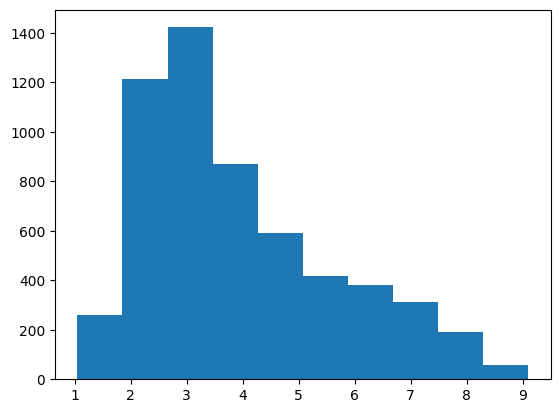

In [108]:
plt.hist(data['Price'], bins=10)

SCATTER PLOT

Text(0.5, 1.0, 'PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')

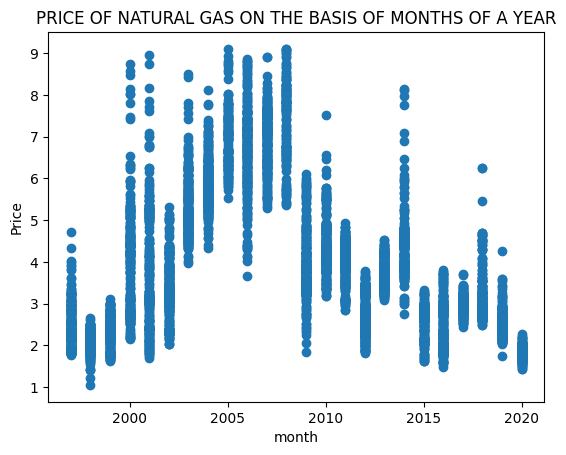

In [109]:
plt.scatter(data['year'],data['Price'])
plt.xlabel('month')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')

Text(0.5, 1.0, 'PRICE OF NATURAL GAS ON THE BASIS OF MONTHS')

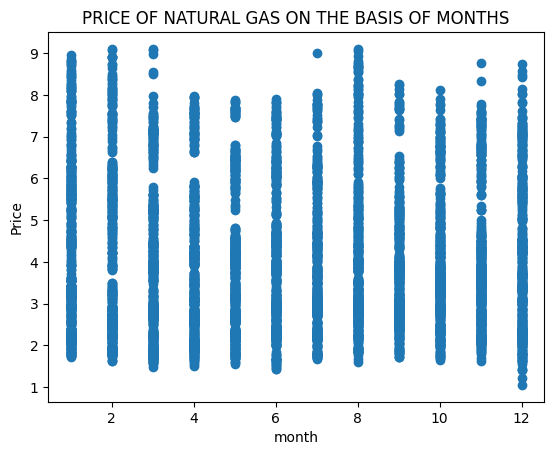

In [110]:
plt.scatter(data['month'],data['Price'])
plt.xlabel('month')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS')

Text(0.5, 1.0, 'PRICE OF NATURAL GAS ON THE BASIS OF DAYS')

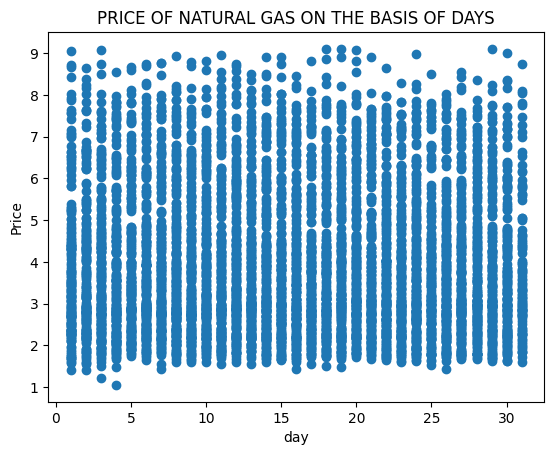

In [111]:
plt.scatter(data['day'],data['Price'])
plt.xlabel('day')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF DAYS')

DISTRIBUTION PLOT

<Axes: xlabel='Price', ylabel='Density'>

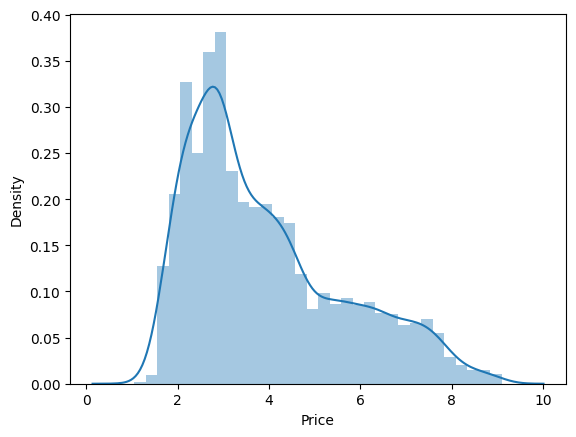

In [112]:
sns.distplot(data.Price)

BOX PLOT

<Axes: xlabel='Price'>

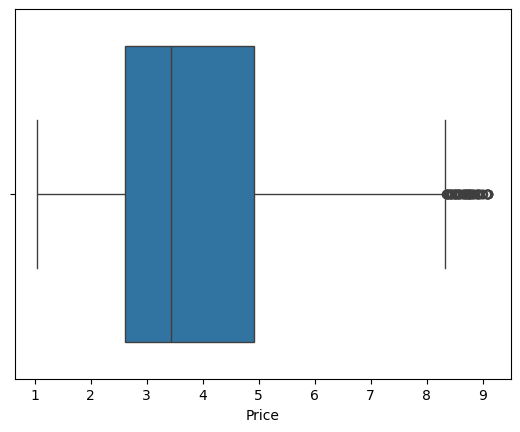

In [113]:
sns.boxplot(data.Price, orient='h')

<Axes: title={'center': 'Price'}, xlabel='year'>

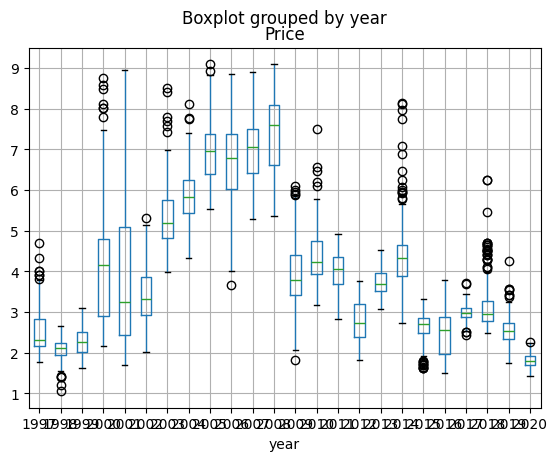

In [114]:
data.boxplot(column='Price',by='year')

<Axes: title={'center': 'Price'}, xlabel='month'>

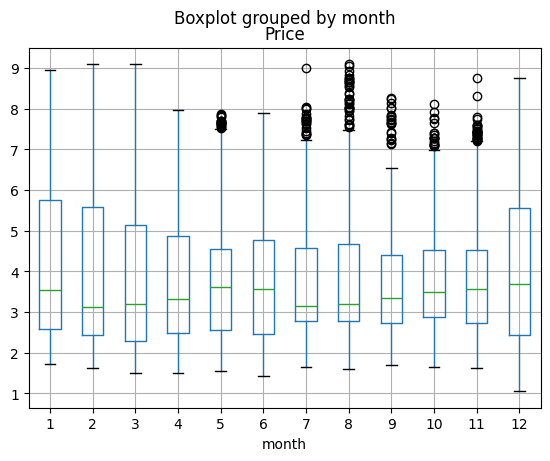

In [115]:
data.boxplot(column='Price',by='month')

<Axes: title={'center': 'Price'}, xlabel='day'>

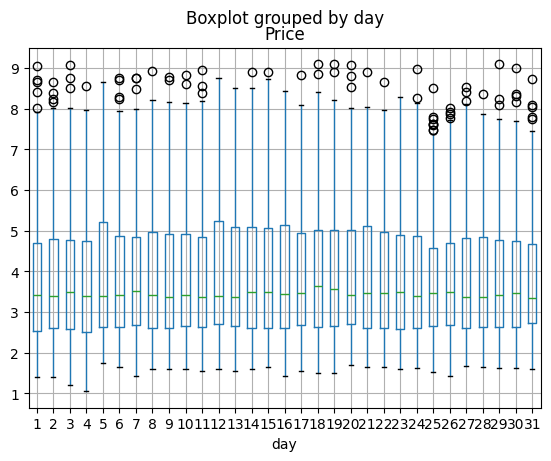

In [116]:
data.boxplot(column='Price',by='day')

HEAT MAP

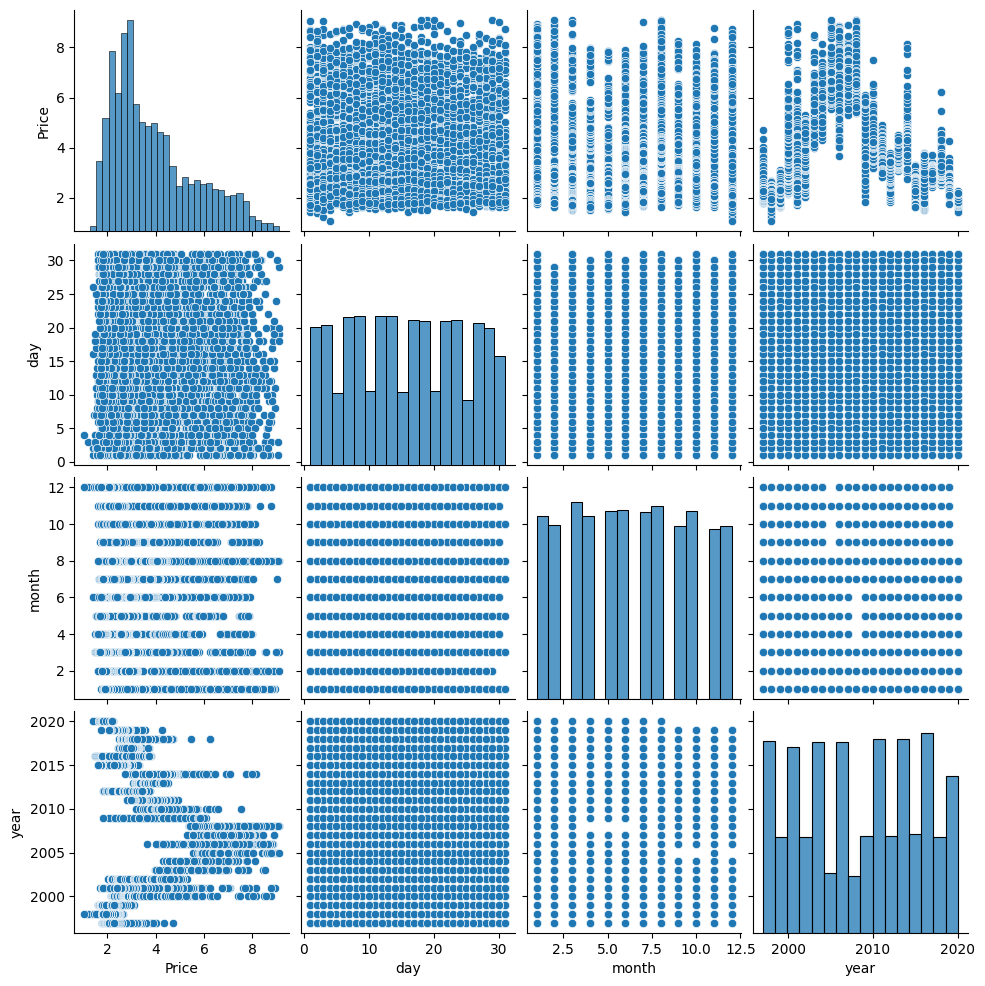

In [117]:
sns.pairplot(data)

<Axes: >

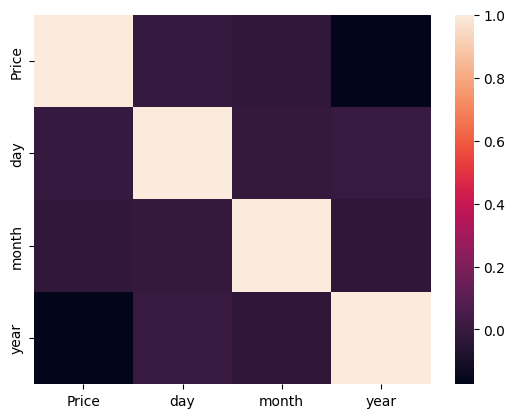

In [118]:
sns.heatmap(data.corr())

## Encoding

Since in our dataset we are having all the columns as numerical value, there isn't any requirement for encoding.

## Separating dependent and independent variables

In [119]:
x=data.iloc[:,1:4].values
y=data.iloc[:,0].values

In [120]:
x

array([[   7,    1, 1997],
       [   8,    1, 1997],
       [   9,    1, 1997],
       ...,
       [   7,    8, 2020],
       [  10,    8, 2020],
       [  11,    8, 2020]])

In [121]:
y

array([3.82, 3.8 , 3.61, ..., 2.15, 2.18, 2.19])

## Standardizing

In [122]:
from sklearn.preprocessing import MinMaxScaler
mms= MinMaxScaler()
x=mms.fit_transform(x)
x

array([[0.2       , 0.        , 0.        ],
       [0.23333333, 0.        , 0.        ],
       [0.26666667, 0.        , 0.        ],
       ...,
       [0.2       , 0.63636364, 1.        ],
       [0.3       , 0.63636364, 1.        ],
       [0.33333333, 0.63636364, 1.        ]])

## Splitting data into train and test set

In [123]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [124]:
x_train.shape

(4576, 3)

In [125]:
x_test.shape

(1144, 3)

In [126]:
y_train.shape

(4576,)

In [127]:
y_test.shape

(1144,)

# Model Building

## Decision Tree Regressor

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

### Performing Hyper tuning for DecisionTreeRegressor

In [129]:
DecisionTreeRegressor()
df_grid = GridSearchCV(DecisionTreeRegressor(),param_grid = {'criterion':['mse', 'friedman_mse', 'mae', 'poisson'],'splitter': ['best', 'random'],'max_depth': range(1, 11),'min_samples_split': range(10, 60, 10),},cv=5,n_jobs=1,scoring='neg_mean_squared_error')
df_grid.fit(x_train, y_train)
print(df_grid.best_params_)

{'criterion': 'friedman_mse', 'max_depth': 10, 'min_samples_split': 10, 'splitter': 'best'}


In [130]:
df=DecisionTreeRegressor(criterion='friedman_mse',max_depth=10,min_samples_split=10,splitter='best')
df.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      min_samples_split=10)

In [131]:
y_pred_df=df.predict(x_test)
y_pred_df

array([4.5       , 2.20714286, 3.02967742, ..., 2.233     , 6.61666667,
       5.2       ])

In [132]:
y_test

array([4.74, 1.63, 3.01, ..., 2.22, 6.69, 5.55])

In [133]:
from sklearn.metrics import r2_score
accur_df=r2_score(y_test,y_pred_df)
print(accur_df)

0.9683899463377701


Saving the DecisionTreeRegressor model into the folder via joblib library.

In [134]:
import joblib
joblib.dump(df,"../DecisionTreeRegressor.save")

['../DecisionTreeRegressor.save']

## Random Forest Regerssor

In [136]:
from sklearn.ensemble import RandomForestRegressor

In [137]:
rfr = RandomForestRegressor(n_estimators=9, random_state=10)
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
y_pred_rfr

array([4.41      , 1.76777778, 2.99555556, ..., 2.22111111, 6.56888889,
       5.32333333])

In [138]:
y_test

array([4.74, 1.63, 3.01, ..., 2.22, 6.69, 5.55])

In [139]:
accur_rfr=r2_score(y_test,y_pred_rfr)
print(accur_rfr)

0.9857775116720077


Saving the RandomForestRegressor model into the folder via joblib library.

In [140]:
import pickle
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(mms, scaler_file)
with open('RandomForestRegressor.pkl', 'wb') as model_file:
    pickle.dump(rfr, model_file)


# Model Evaluation for Decision Tree Regressor

In [141]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,y_pred_df)

0.19149868435007258

In [142]:
mean_squared_error(y_test,y_pred_df)

0.09597536322835361

In [143]:
from math import sqrt
sqrt(mean_squared_error(y_test,y_pred_df))

0.3097989077262113

# Model Evaluation for Random Forest Regressor


In [144]:
mean_absolute_error(y_test,y_pred_rfr)

0.12526709401709402

In [145]:
mean_squared_error(y_test,y_pred_rfr)

0.04318273223689889

In [146]:
sqrt(mean_squared_error(y_test,y_pred_rfr))

0.20780455297442088

from the evaluation report we can see that the Random Forest Regressor is more closer to zero.